# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data
training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Number of training examples
n_train = y_train.shape[0]

# Number of validation examples
n_validation = y_valid.shape[0]

# Number of testing examples.
n_test = y_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels are there in the dataset?
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

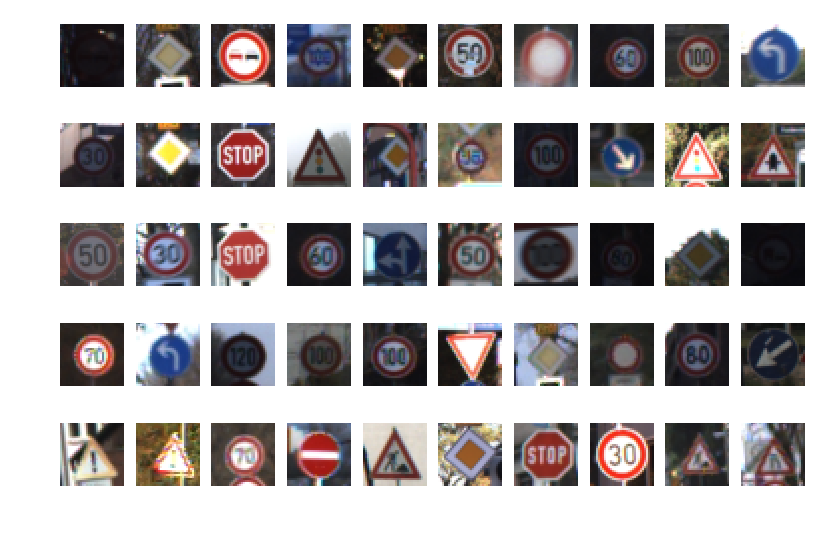

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

fig, ax = plt.subplots(nrows = 5, ncols = 10, dpi = 160)
flatten_ax = ax.flatten()

for i in range(5 * 10):
    flatten_ax[i].axis('off')
    index = random.randint(0, len(X_train))
    flatten_ax[i].imshow(X_train[index])

plt.show()

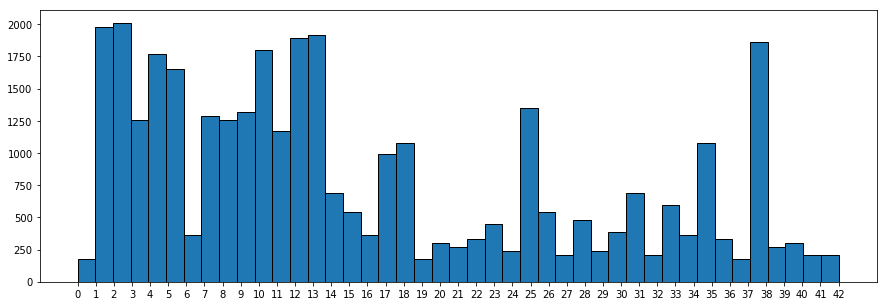

In [4]:
# Plot the number of occurrences for each sign in the dataset
f, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.set_xticks(range(n_classes))
ax.hist(y_train, bins = n_classes, edgecolor = 'k')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

#### Augment the data set

Since the distribution is not uniform, we need to augment the data set in order to have the same number of occurrences for each sign. In the following code we modify the lightness and the rotation of the images and append the modified images to the data set until we reach the target number of samples and then plot the histogram.


In [5]:
import numpy as np
import cv2

In [6]:
# Function to randomly increment/decrement the lightness of an image
def modifyLightness(img):
    value = np.random.randint(-50, 51)
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    # Modify lightness and limit values between 0 and 255
    hls[:,:,1] = np.clip(hls[:,:,1] + value, 0, 255)
    out_img = cv2.cvtColor(img, cv2.COLOR_HLS2RGB)
    return out_img

# Function to rotate the image
def rotate(img):
    # Rotation between -10° and 10°
    angle = np.random.randint(-10, 11)
    out_img = cv2.getRotationMatrix2D((16, 16), angle, 1)
    return cv2.warpAffine(img, out_img, (32,32))

def modifyImage(img):
    choice = np.random.choice([0,1])
    if choice == 0:
        out_img = modifyLightness(img)
    elif choice == 1:
        out_img = rotate(img)
    return out_img

In [7]:
# Dictionary creation
data_dict = {key:None for key in set(y_train)}

for i in range(0,len(y_train)):
    if data_dict[y_train[i]] == None:
        data_dict[y_train[i]] = [i]
    else:
        data_dict[y_train[i]].append(i)

In [8]:
target_samples = 4000

aug_X_train = []
aug_y_train = []

# generate new samples for each key until target value is reached
for key in data_dict.keys():
    samples_to_create = target_samples - len(data_dict[key])
    for i in range(0, samples_to_create):
        img = X_train[np.random.choice(data_dict[key])]
        
        # Modify lightness  and rotation, then append
        modified_img = modifyImage(img)
        aug_X_train.append(modified_img)
        aug_y_train.append(key)

# merge with existing 
for i in range(0,len(X_train)):
    aug_X_train.append(X_train[i])
    aug_y_train.append(y_train[i])

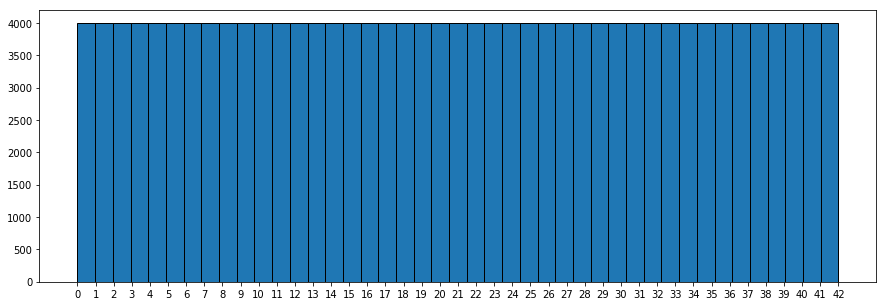

In [9]:
# Plot the number of occurrences for each sign in the augmented dataset
f, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.set_xticks(range(n_classes))
ax.hist(aug_y_train, bins = n_classes, edgecolor = 'k')
plt.show()

#### Shuffle the training data

In [10]:
from sklearn.utils import shuffle

aug_X_train, aug_y_train = shuffle(aug_X_train, aug_y_train)

### Model Architecture

#### Implement LeNet-5
Implement the LeNet-5 neural network architecture.

This is the only cell you need to edit.

##### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels.

##### Architecture
Layer 1: Convolutional. The output shape should be 28x28x6.

Activation. Your choice of activation function.

Pooling. The output shape should be 14x14x6.

Layer 2: Convolutional. The output shape should be 10x10x16.

Activation. Your choice of activation function.

Pooling. The output shape should be 5x5x16.

Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.

Layer 3: Fully Connected. This should have 120 outputs.

Activation. Your choice of activation function.

Layer 4: Fully Connected. This should have 84 outputs.

Activation. Your choice of activation function.

Layer 5: Fully Connected (Logits). This should have 10 outputs.

##### Output
Return the result of the 2nd fully connected layer.

In [11]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [12]:
### Define your architecture here.
def LeNet(x):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    ## Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    
    # 5x5 filter with an input depth of 3 and an output depth of 6
    conv1_W = tf.Variable(tf.truncated_normal(shape = (5, 5, 3, 6), mean = mu, stddev = sigma))
    # bias
    conv1_b = tf.Variable(tf.zeros(6))
    # conv2d convolves the filter over the images, then the bias is added.
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1, 1, 1, 1], padding = 'VALID') + conv1_b
    
    ## Activation
    conv1 = tf.nn.relu(conv1)
    
    ## Pooling with 2x2 kernel and 2x2 stride. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    
    ## Layer 2: Convolutional. Output = 10x10x16.
    
    # 5x5 filter with an input depth of 6 and an output depth of 16
    conv2_W = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
    # bias
    conv2_b = tf.Variable(tf.zeros(16))
    # conv2d convolves the filter over the images, then the bias is added.
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides = [1, 1, 1, 1], padding = 'VALID') + conv2_b
    
    ## Activation
    conv2 = tf.nn.relu(conv2)
    
    ## Pooling with 2x2 kernel and 2x2 stride. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    
    ## Flatten into a vector. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    ## Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape = (400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    ## Activation
    fc1 = tf.nn.relu(fc1)
    
    ## Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape = (120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    ## Activation
    fc2 = tf.nn.relu(fc2)
    
    ## Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape = (84, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Features and Labels
Train LeNet to classify data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

#### Training Pipeline
Create a training pipeline that uses the model to classify data.

In [14]:
EPOCHS = 20
BATCH_SIZE = 128
rate = 0.0005

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits = logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(aug_X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        # Shuffle the training set
        aug_X_train, aug_y_train = shuffle(aug_X_train, aug_y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = aug_X_train[offset:end], aug_y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        print("EPOCH {} ...".format(i+1))
        # Evaluate accuracy on the training set
        training_accuracy = evaluate(X_train, y_train)
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        # Evaluate accuracy on the validation set
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.909
Validation Accuracy = 0.796

EPOCH 2 ...
Training Accuracy = 0.952
Validation Accuracy = 0.851

EPOCH 3 ...
Training Accuracy = 0.969
Validation Accuracy = 0.868

EPOCH 4 ...
Training Accuracy = 0.980
Validation Accuracy = 0.889

EPOCH 5 ...
Training Accuracy = 0.983
Validation Accuracy = 0.896

EPOCH 6 ...
Training Accuracy = 0.987
Validation Accuracy = 0.900

EPOCH 7 ...
Training Accuracy = 0.989
Validation Accuracy = 0.906

EPOCH 8 ...
Training Accuracy = 0.986
Validation Accuracy = 0.901

EPOCH 9 ...
Training Accuracy = 0.991
Validation Accuracy = 0.919

EPOCH 10 ...
Training Accuracy = 0.983
Validation Accuracy = 0.918

EPOCH 11 ...
Training Accuracy = 0.994
Validation Accuracy = 0.923

EPOCH 12 ...
Training Accuracy = 0.994
Validation Accuracy = 0.919

EPOCH 13 ...
Training Accuracy = 0.994
Validation Accuracy = 0.920

EPOCH 14 ...
Training Accuracy = 0.992
Validation Accuracy = 0.918

EPOCH 15 ...
Training Accuracy = 0.994
Valid

#### Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [20]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.908


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

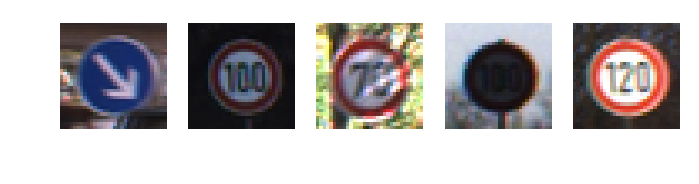

In [21]:
import glob
import matplotlib.image as mpimg

# Import images
image_list = []
for filename in glob.glob('myimages/*.png'):
    image_list.append(mpimg.imread(filename))
    
# plot images
fig, ax = plt.subplots(1,5, dpi=160, figsize=(5,5))
for i in range(5):
    ax[i].axis('off')
    ax[i].imshow(image_list[i])    
plt.show()

### Predict the Sign Type for Each Image

In [22]:
# Set labels (correct prediction)
labels = [
    '38',
    '7',
    '4',
    '7',
    '8'
]

# Predict sign type
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_logits = sess.run(tf.nn.softmax(logits), feed_dict={x: image_list, y: labels})
    
for cont, logit in enumerate(my_logits):
    print('The ' + str(cont + 1) + '° sign type is ' + str(np.argmax(logit)))

INFO:tensorflow:Restoring parameters from ./lenet
The 1° sign type is 3
The 2° sign type is 3
The 3° sign type is 3
The 4° sign type is 3
The 5° sign type is 8


### Analyze Performance

In [23]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    accuracy = evaluate(image_list, labels)
    print("Accuracy = {:.3f}".format(accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy = 0.200


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [24]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    for cont, logit in enumerate(my_logits):
        top5 = sess.run(tf.nn.top_k(tf.constant(logit), k = 5))
        print("The top5 max probability and their indexes related to the {:d}° sign are:\n\n".format(cont + 1) + str(top5) + '\n\n')

The top5 max probability and their indexes related to the 1° sign are:

TopKV2(values=array([ 0.12940538,  0.09520334,  0.07817145,  0.05288851,  0.05018421], dtype=float32), indices=array([ 3,  8,  5,  6, 20], dtype=int32))


The top5 max probability and their indexes related to the 2° sign are:

TopKV2(values=array([ 0.10577632,  0.09100055,  0.08542141,  0.05749705,  0.05249943], dtype=float32), indices=array([ 3,  8,  5,  7, 20], dtype=int32))


The top5 max probability and their indexes related to the 3° sign are:

TopKV2(values=array([ 0.10777834,  0.09465593,  0.08328136,  0.0635726 ,  0.03677879], dtype=float32), indices=array([ 3,  5,  8,  6, 20], dtype=int32))


The top5 max probability and their indexes related to the 4° sign are:

TopKV2(values=array([ 0.09513693,  0.0830178 ,  0.06556524,  0.05923611,  0.04210715], dtype=float32), indices=array([ 3,  8,  5, 20,  7], dtype=int32))


The top5 max probability and their indexes related to the 5° sign are:

TopKV2(values=array(